# 4.1.9 Locally Weighted Linear Regression (LWLR)
### Explanation of Locally Weighted Linear Regression and Its Scenarios

**Locally Weighted Linear Regression (LWLR)**, also known as Locally Weighted Scatterplot Smoothing (LOWESS), is a non-parametric regression technique. Unlike traditional linear regression, which fits a single line to the entire dataset, LWLR fits multiple lines to small subsets of the data. This makes LWLR particularly useful for datasets with non-linear relationships.

**Key Concepts**:
- **Locality**: LWLR gives more weight to data points near the query point and less weight to those farther away.
- **Bandwidth Parameter (τ)**: Controls the width of the region considered local. Smaller τ results in more localized fits, while larger τ results in a smoother, more global fit.

**Scenarios for LWLR**:
- **Non-Linear Relationships**: When the relationship between the features and the target variable is not linear.
- **Small to Medium-sized Datasets**: LWLR can be computationally expensive for large datasets.
- **Smoothly Varying Data**: When the underlying trend in the data varies smoothly over the input space.

In this section, we will explore LWLR and its implementation from scratch in Python.


<hr><hr>

### Readings:
- [Linear Regression: How to overcome underfitting with Locally Weighted Linear Regression (LWLR)](https://itnext.io/linear-regression-how-to-overcome-underfitting-with-locally-weight-linear-regression-lwlr-e867f0cde4a4)
- [Locally Weight Linear Regression](http://lovinglavigne.com/LWLR/LWLR.html)

<hr><hr>

## Procedure for Locally Weighted Linear Regression (LWLR)

1. **Define the Weighting Function**:
   The weighting function determines how much influence each data point has on the prediction at the query point. A common choice is the Gaussian kernel:
$$w(i) = \exp\left(-\frac{(x_i - x_{query})^2}{2\tau^2}\right)$$


2. **Compute Weights**:
   For each query point, compute the weights for all data points using the weighting function.


3. **Fit a Weighted Linear Model**:
   Fit a linear model to the weighted data points. This involves solving the weighted least squares problem:
   $$\theta = (X^T W X)^{-1} X^T W Y$$
   
   where \( W \) is a diagonal matrix of weights.


5. **Make Predictions**:
   Use the fitted model to make predictions at the query point.


6. **Repeat for All Query Points**:
   Repeat steps 2-4 for all query points to obtain the final predictions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lwlr(X, Y, x_query, tau):
    
    m = X.shape[0]
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    
    # Adding intercept term to X
    X_intercept = np.hstack([np.ones((m, 1)), X])
    x_query_intercept = np.hstack([[1], x_query])
    
    # Fitting the weighted linear regression model
    theta = np.linalg.inv(X_intercept.T @ W @ X_intercept) @ (X_intercept.T @ W @ Y)
    
    # Making prediction
    y_pred = x_query_intercept @ theta
    
    return y_pred

In [3]:
# Generating some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

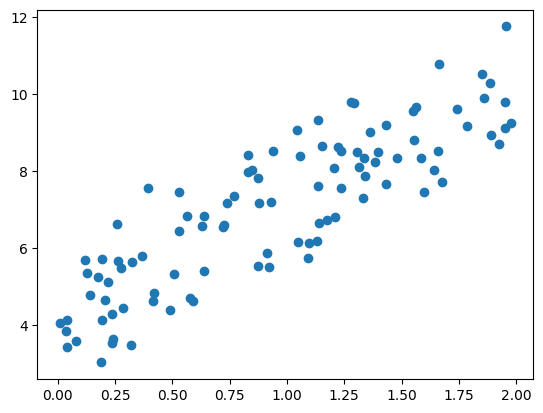

In [4]:
plt.scatter(X,Y)
plt.show()

In [5]:
# Reshape Y to a 1D array
Y = Y.ravel()

# Predicting using LWLR
tau = 0.5  # Bandwidth parameter
x_query_points = np.linspace(0, 2, 100)
y_pred_lwlr = np.array([lwlr(X, Y, x_query, tau) for x_query in x_query_points])

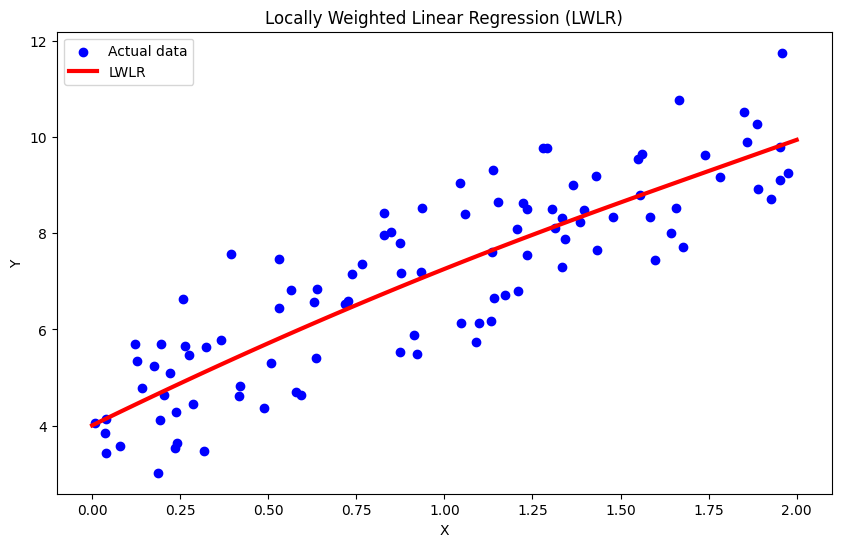

In [6]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(x_query_points, y_pred_lwlr, color='red', linewidth=3, label='LWLR')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Linear Regression (LWLR)')
plt.legend()
plt.show()

## Conclusion

Locally Weighted Linear Regression (LWLR) is a powerful non-parametric regression technique suitable for datasets with non-linear relationships. By focusing on local subsets of data, LWLR can capture complex patterns that global models might miss. However, its computational complexity makes it more suitable for small to medium-sized datasets. **The choice of the bandwidth parameter (τ) is crucial, as it controls the trade-off between bias and variance**. Through careful tuning and understanding of the data, LWLR can provide flexible and accurate predictions.
